![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.




Carguen la base de datos preparada desde la fase 2.


In [61]:
#En esta parte solamente importamos las librerias pandas y numpy para poder empezar a trabajar
import numpy as np
import pandas as pd

#Solamente leemos el dataframe 
df = pd.read_csv('autos_exportados2.csv',sep=',')

#tenia solo una fila que es Nan, debe haber sido un error de exportación
df = df.dropna()

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 1 to 204
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              204 non-null    float64
 1   wheelbase              204 non-null    float64
 2   curbweight             204 non-null    float64
 3   enginesize             204 non-null    float64
 4   boreratio              204 non-null    float64
 5   stroke                 204 non-null    float64
 6   compressionratio       204 non-null    float64
 7   horsepower             204 non-null    float64
 8   peakrpm                204 non-null    float64
 9   citympg                204 non-null    float64
 10  highwaympg             204 non-null    float64
 11  price                  204 non-null    float64
 12  fueltype_diesel        204 non-null    object 
 13  fueltype_gas           204 non-null    object 
 14  aspiration_std         204 non-null    object 
 15  aspiration_

Separen el dataset en X, y (variable objetivo)

In [44]:
#Vamos a utilizar la librería sklearn ya que es la librería más elegida para este tipo de trabajo

from sklearn.model_selection import train_test_split

Separen el dataset en X_train, X_test, y_train y y_test

In [45]:
#Vamos a realizar la separación de las variables X e Y para luego trabajarlos en el entrenamiento

# Selecciona todas las columnas excepto el precio
X=df.drop(columns=['price'])

# Selecciona solamente la columna de precio
y=df['price']


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# Ahora tienes X_train y y_train para el conjunto de entrenamiento, y X_test y y_test para el conjunto de prueba.

(163, 44)
(41, 44)
(163,)
(41,)


In [46]:
from sklearn.impute import SimpleImputer

# Creamos un imputador que reemplaza los NaN con la media de cada columna
imputer = SimpleImputer(strategy='mean')

# Aplicamos la imputación a X_train y X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [47]:
from sklearn.linear_model import LinearRegression
lineal_reg= LinearRegression()

In [48]:
#Entrenar el modelo de regresión lineal: Utilizamos el método fit del modelo de regresión lineal para entrenar el modelo con los datos de entrenamiento 
# (X_train_imputed y y_train),
# donde X_train_imputed es el conjunto de datos de entrenamiento con los valores faltantes imputados.

lineal_reg.fit(X_train,y_train)

LinearRegression()

In [49]:
#Utilizamos el método predict del modelo de regresión lineal para hacer predicciones sobre los datos de prueba (X_test_imputed), 
# donde X_test_imputed son los datos de prueba con los valores faltantes imputados.
lineal_predict_sca= lineal_reg.predict(X_test)

In [50]:
# Utilizamos las métricas MAE (Error Absoluto Medio) y R² (Coeficiente de Determinación)
# para evaluar el rendimiento del modelo de regresión lineal en los datos de prueba.
from sklearn.metrics import mean_absolute_error, r2_score

mae = round(mean_absolute_error(y_test, lineal_predict_sca),3)

r2 = round(r2_score(y_test, lineal_predict_sca),3) 

print(f"MAE: {mae}")
print(f"R²: {r2}")

MAE: 0.32
R²: 0.846


Instancien, entrenen y predigan sobre un árbol de decisión asignando una profundidad máxima arbitraria

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Instanciar el modelo de árbol de decisión con profundidad máxima arbitraria
max_depth = 5  # Profundidad máxima
tree_reg = DecisionTreeRegressor(max_depth=max_depth)

# Entrenar el modelo
tree_reg.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = tree_reg.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)


Error cuadrático medio: 0.19277799481690489


Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo

Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Definir los valores de max_depth a probar
param_grid = {'max_depth': range(1, 21)}

# Instanciar el modelo de árbol de decisión
tree_reg = DecisionTreeRegressor()

# Configurar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

# Realizar la búsqueda en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor valor de max_depth
best_max_depth = grid_search.best_params_['max_depth']
print("Mejor valor de max_depth:", best_max_depth)

# Construir un modelo con el mejor valor de max_depth
best_tree_reg = DecisionTreeRegressor(max_depth=best_max_depth)

# Entrenar el modelo con los datos de entrenamiento
best_tree_reg.fit(X_train, y_train)

# Hacer predicciones con el modelo optimizado
y_pred_best = best_tree_reg.predict(X_test)

# Calcular el error cuadrático medio para el modelo optimizado
mse_best = mean_squared_error(y_test, y_pred_best)
print("Error cuadrático medio con max_depth optimizado:", mse_best)


Mejor valor de max_depth: 18
Error cuadrático medio con max_depth optimizado: 0.28167476661877144


Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 

In [64]:
from sklearn.neighbors import KNeighborsRegressor

# Seleccionar solo las características numéricas
X_numeric = df.select_dtypes(include=['int64', 'float64'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_numeric, X_test_numeric, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Instanciar el modelo de k-vecinos más cercanos con un número arbitrario de vecinos (por ejemplo, 5)
k = 5
knn = KNeighborsRegressor(n_neighbors=k)

# Entrenar el modelo
knn.fit(X_train_numeric, y_train)

# Predecir sobre el conjunto de prueba
y_pred_numeric = knn.predict(X_test_numeric)



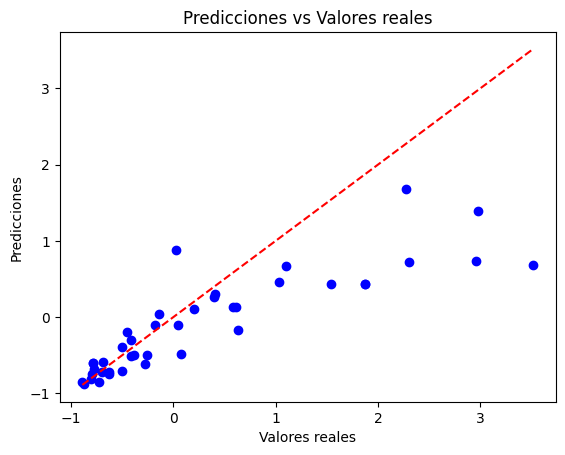

In [65]:
import matplotlib.pyplot as plt

# Graficar las predicciones frente a los valores reales
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales')
plt.show()


Encuentre el valor óptimo para k

In [66]:
from sklearn.model_selection import GridSearchCV

# Definir la lista de valores de k que deseas probar
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}

# Instanciar el modelo de k-vecinos más cercanos
knn = KNeighborsRegressor()

# Instanciar el objeto GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

# Realizar la búsqueda de cuadrícula en los datos de entrenamiento
grid_search.fit(X_train_numeric, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejor valor de k:", grid_search.best_params_)

# Instanciar el modelo de k-vecinos más cercanos con el mejor valor de k
best_k = grid_search.best_params_['n_neighbors']
best_knn = KNeighborsRegressor(n_neighbors=best_k)

# Entrenar el modelo con el conjunto de entrenamiento completo
best_knn.fit(X_train_numeric, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred_best = best_knn.predict(X_test_numeric)


Mejor valor de k: {'n_neighbors': 5}


Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcular el error cuadrático medio
mse_knn = mean_squared_error(y_test, y_pred_best)

# Calcular el error absoluto medio
mae_knn = mean_absolute_error(y_test, y_pred_best)

# Calcular el coeficiente de determinación (R²)
r2_knn = r2_score(y_test, y_pred_best)

print("Error cuadrático medio (KNN):", mse_knn)
print("Error absoluto medio (KNN):", mae_knn)
print("Coeficiente de determinación (R²) (KNN):", r2_knn)


Error cuadrático medio (KNN): 0.3910330212034844
Error absoluto medio (KNN): 0.39306539722919026
Coeficiente de determinación (R²) (KNN): 0.7264474337442843


De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo? 

R/
Para mejorar el rendimiento del modelo de k-vecinos más cercanos, aquí hay algunas estrategias que podrías considerar:

1. Normalización de características: Asegúrate de que todas las características tengan la misma escala. La normalización puede ayudar a mejorar el rendimiento del modelo de k-vecinos más cercanos, ya que se basa en calcular distancias entre puntos.

2. Selección de características: Analiza y selecciona las características más relevantes para el problema. Puedes utilizar técnicas como la importancia de características o métodos de selección de características para identificar las variables más informativas.

3. Optimización de hiperparámetros: Experimenta con diferentes valores de k para encontrar el valor óptimo que minimice el error en el conjunto de prueba. Además, considera otras métricas de distancia y pesos para los vecinos más cercanos.

4. Tratamiento de datos desbalanceados: Si tienes clases desbalanceadas en el conjunto de datos, considera técnicas de remuestreo o métodos de ponderación para tratar este problema y mejorar la capacidad del modelo para predecir las clases minoritarias.

6. Validación cruzada: Utiliza técnicas de validación cruzada para evaluar el rendimiento del modelo de forma más robusta y reducir el riesgo de sobreajuste.
